In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F

In [ ]:
transform = transforms.ToTensor()
data = torchvision.datasets.MNIST('data', download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
W = torch.randn((784, 10)) / (784*10)**0.5
W.requires_grad = True



In [ ]:
# Forward
idx = torch.randint(0, len(data), size=())
image, label = data.__getitem__(idx)
image.shape

logits = image.view(-1, 28 * 28) @ W
max, _ = torch.max(logits, dim=1)

y_pred = torch.exp(logits - max)
y_pred_probs = y_pred/y_pred.sum()

y_true = F.one_hot(torch.tensor([label]), num_classes=10)/1.0
loss = -torch.sum(y_true*torch.log(y_pred_probs), dim=1)

W.grad = None
loss = loss.mean()
loss.backward()

W.data -= 0.01*W.grad
print(loss.item())

0.08940388262271881
0.5464893579483032
0.40544646978378296
0.021601151674985886
0.04826227203011513
0.10147683322429657
0.13977622985839844
0.21123023331165314
0.022567102685570717
0.005469590425491333
0.32783353328704834
1.1392854452133179
1.459402322769165
0.071649931371212
7.295892715454102
0.29797840118408203
0.18424832820892334
0.6939908266067505
0.901302695274353
0.12989754974842072
0.023064639419317245
1.4490692615509033
1.2296591997146606
0.2335280179977417
0.07300358265638351
1.0960615873336792
0.4708438813686371
0.0038413777947425842
0.05517103895545006
0.9227317571640015
0.8235194683074951
0.06282572448253632
0.1251392960548401
0.1806562840938568
0.03743383660912514
2.5423450469970703
0.37678200006484985
0.549879789352417
1.0271440744400024
0.8313155770301819
0.012785340659320354
0.9959069490432739
0.24401713907718658
0.031962282955646515
1.5833770036697388
0.750751256942749
0.3076104521751404
1.2045106887817383
0.9183307886123657
0.3077838122844696
0.5746040344238281
0.6753

In [ ]:
torch.round(y_pred_probs, decimals=5)

tensor([[9.9973e-01, 3.0000e-05, 3.0000e-05, 3.0000e-05, 3.0000e-05, 3.0000e-05,
         3.0000e-05, 3.0000e-05, 3.0000e-05, 3.0000e-05]],
       grad_fn=<RoundBackward1>)

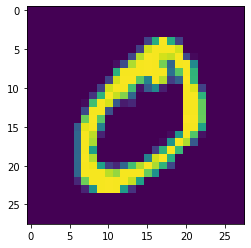

In [ ]:
plt.imshow(image.numpy()[0])

tensor([2.3344], grad_fn=<NegBackward0>)

In [ ]:
image, label = data.__getitem__(42)
logits = image.view(-1, 28 * 28) @ W
max, _ = torch.max(logits, dim=1)
y_pred = torch.exp(logits - max)
y_pred_probs = y_pred/y_pred.sum()
torch.max(y_pred_probs, dim=1), label

(torch.return_types.max(
 values=tensor([0.8041], grad_fn=<MaxBackward0>),
 indices=tensor([7])), 7)

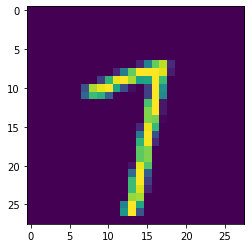

In [ ]:
plt.imshow(image[0].numpy())

In [ ]:
y_pred_probs

tensor([[0.0034, 0.0162, 0.0023, 0.0066, 0.0042, 0.0092, 0.0020, 0.8041, 0.0085,
         0.1436]], grad_fn=<DivBackward0>)